In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show

from osgeo import gdal

import os
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

os.getcwd()

'/data/private/Thesis/May'

##### **Crop with gdal** and **Call shapefile**

In [1]:
val = gpd.read_file("Data/04_Validation/Validation_pixelvalues.shp")
print(type(val))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [2]:
val.head()

,Class,s11,s21,slf1,geometry
0,1,1,1,1,POINT (670984.904 140940.473)
1,1,1,1,1,POINT (671862.628 141505.122)
2,1,1,1,1,POINT (670778.150 144304.659)
3,1,0,0,0,POINT (798429.002 177898.933)
4,1,1,1,1,POINT (782828.189 174076.285)


In [3]:
val = val.rename({'s11': 's1', 's21': 's2', 'slf1': 'slf'}, axis='columns')
val.head()

,Class,s1,s2,slf,geometry
0,1,1,1,1,POINT (670984.904 140940.473)
1,1,1,1,1,POINT (671862.628 141505.122)
2,1,1,1,1,POINT (670778.150 144304.659)
3,1,0,0,0,POINT (798429.002 177898.933)
4,1,1,1,1,POINT (782828.189 174076.285)


#### **Visualize**

epsg:32647


<AxesSubplot: >

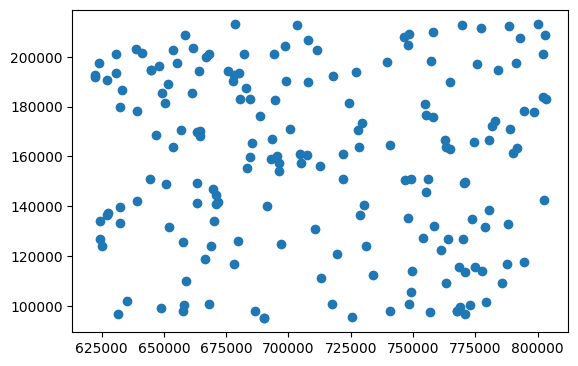

In [4]:
#Plot point shapefile
print(val.crs)
val.plot()

In [6]:
vale = val['Class'].to_numpy()
vale

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1])

In [5]:
s1 = val['s1'].to_numpy()
s2 = val['s2'].to_numpy()
slf = val['slf'].to_numpy()

#### **Accuracy assessment**

##### **S1**

In [9]:
f1 = f1_score(vale, s1)
accuracy = accuracy_score(vale, s1)
print('f1: ',  f1)
print('accuracy: ',  accuracy)

cfm = confusion_matrix(vale, s1)

df = pd.DataFrame(cfm, columns=['NOP', 'OP'], index=['NOP', 'OP'])
print(df)

from sklearn.metrics import classification_report
print('Train report', classification_report(vale, s1))

f1:  0.9313725490196079
accuracy:  0.9243243243243243
     NOP  OP
NOP   76   7
OP     7  95
Train report               precision    recall  f1-score   support

           0       0.92      0.92      0.92        83
           1       0.93      0.93      0.93       102

    accuracy                           0.92       185
   macro avg       0.92      0.92      0.92       185
weighted avg       0.92      0.92      0.92       185



In [10]:
f1 = f1_score(vale, s2)
accuracy = accuracy_score(vale, s2)
print('f1: ',  f1)
print('accuracy: ',  accuracy)

cfm = confusion_matrix(vale, s2)

df = pd.DataFrame(cfm, columns=['NOP', 'OP'], index=['NOP', 'OP'])
print(df)

from sklearn.metrics import classification_report
print('Train report', classification_report(vale, s2))

f1:  0.8558139534883722
accuracy:  0.8324324324324325
     NOP  OP
NOP   62  21
OP    10  92
Train report               precision    recall  f1-score   support

           0       0.86      0.75      0.80        83
           1       0.81      0.90      0.86       102

    accuracy                           0.83       185
   macro avg       0.84      0.82      0.83       185
weighted avg       0.84      0.83      0.83       185



In [11]:
f1 = f1_score(vale, slf)
accuracy = accuracy_score(vale, slf)
print('f1: ',  f1)
print('accuracy: ',  accuracy)

cfm = confusion_matrix(vale, slf)

df = pd.DataFrame(cfm, columns=['NOP', 'OP'], index=['NOP', 'OP'])
print(df)

from sklearn.metrics import classification_report
print('Train report', classification_report(vale, slf))

f1:  0.9261083743842364
accuracy:  0.918918918918919
     NOP  OP
NOP   76   7
OP     8  94
Train report               precision    recall  f1-score   support

           0       0.90      0.92      0.91        83
           1       0.93      0.92      0.93       102

    accuracy                           0.92       185
   macro avg       0.92      0.92      0.92       185
weighted avg       0.92      0.92      0.92       185

